In [17]:
# import statements
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [3]:
# Task 1

data = pd.read_csv("data.csv", encoding='ISO-8859-1', header=None)


In [10]:
# Task 2

data.columns = ['Sentiment', 'Text']

X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Sentiment'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vect, y_train)

y_pred = model.predict(X_test_vect)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))



Accuracy: 0.7556701030927835
              precision    recall  f1-score   support

    negative       0.77      0.55      0.64       110
     neutral       0.77      0.91      0.83       571
    positive       0.71      0.54      0.61       289

    accuracy                           0.76       970
   macro avg       0.75      0.66      0.69       970
weighted avg       0.75      0.76      0.74       970



In [15]:
new_headlines = [
    "Company profits soar in the fourth quarter, reaching a record high.",
    "Major layoffs announced as part of a cost-cutting initiative.",
    "Innovative new product launches to rave reviews from consumers."
]

new_headlines_vect = vectorizer.transform(new_headlines)

predicted_sentiments = model.predict(new_headlines_vect)

results = pd.DataFrame({
    'Headline': new_headlines,
    'Predicted Sentiment': predicted_sentiments
})

print(results)


                                            Headline Predicted Sentiment
0  Company profits soar in the fourth quarter, re...            positive
1  Major layoffs announced as part of a cost-cutt...             neutral
2  Innovative new product launches to rave review...            positive


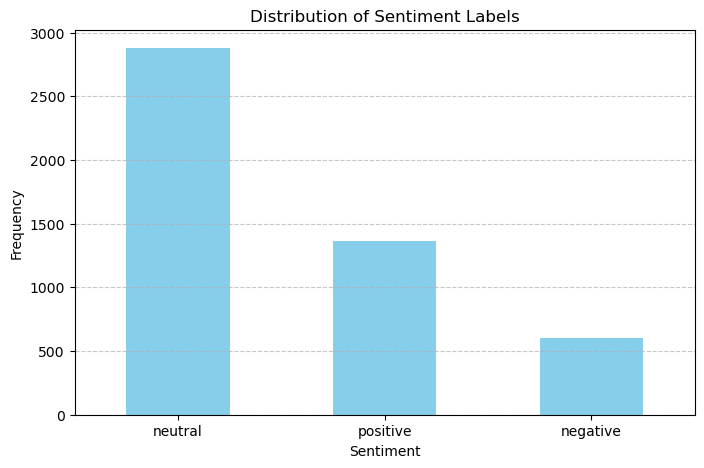

In [21]:
# Task 3: Visualization

sentiment_counts = data['Sentiment'].value_counts()

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


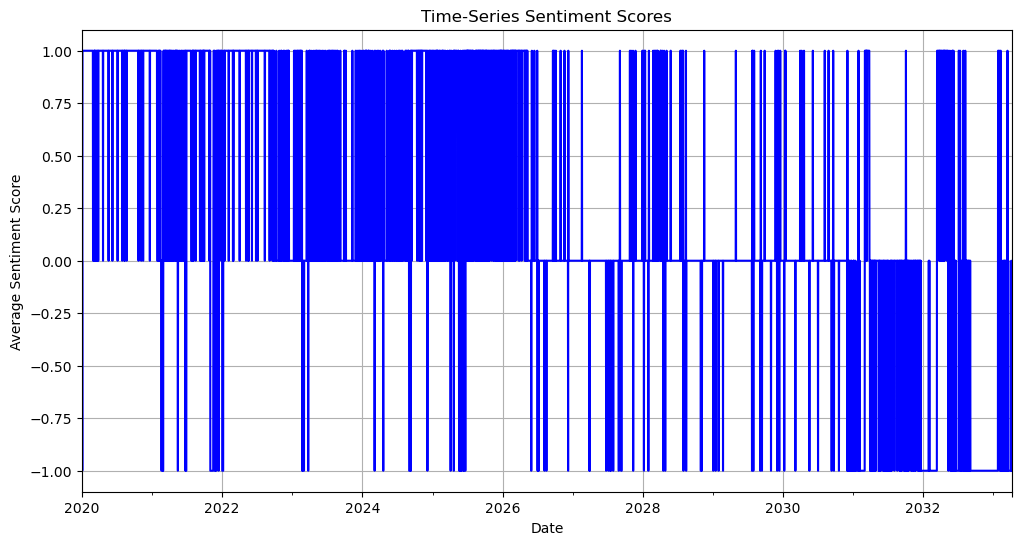

In [23]:
# Assuming one entry per day starting from January 1, 2020
data['Date'] = pd.date_range(start='2020-01-01', periods=len(data), freq='D')

sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
data['Sentiment_Score'] = data['Sentiment'].map(sentiment_mapping)

time_series = data.groupby('Date')['Sentiment_Score'].mean()

plt.figure(figsize=(12, 6))
time_series.plot(title='Time-Series Sentiment Scores', color='blue')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

Task 4

1) The sentiment scores' time-series analysis indicates a complex interplay of factors influencing public sentiment over time. Understanding these patterns can help in predicting future sentiment trends based on current events or historical cycles. For businesses or policymakers, aligning strategies with these sentiment trends could be crucial in decision-making processes.

2) In the financial domain, sentiment scores derived from news headlines, social media posts, or financial reports can be a powerful tool for predicting market movements and informing investment strategies. By analyzing sentiment trends, financial analysts and investors can gauge public perception and investor confidence, which often precede changes in stock prices, market volatility, and overall economic conditions. For instance, consistently negative sentiment might predict a downturn in stock prices, offering a signal to sell or short-sell certain assets. Conversely, a rising positive sentiment can indicate a good time to buy or increase holdings in anticipation of rising prices.